In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('/content/drive/MyDrive/customers (2).csv')

In [15]:
print("🔍 First 5 rows:")
print(df.head())

🔍 First 5 rows:
   EmailLength  NumLinks  HasAttachment  SenderReputation  SubjectLength  Spam
0          122         2              1              0.44             24     1
1          455         1              1              0.29             30     0
2          368         8              0              0.95             33     0
3          290         7              1              0.76              5     1
4          126         9              1              0.14             39     1


In [4]:
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


Shape: (500, 6)
Missing values:
 EmailLength         0
NumLinks            0
HasAttachment       0
SenderReputation    0
SubjectLength       0
Spam                0
dtype: int64

Data types:
 EmailLength           int64
NumLinks              int64
HasAttachment         int64
SenderReputation    float64
SubjectLength         int64
Spam                  int64
dtype: object


In [5]:
target_col = 'Spam'  # Change if your target column has a different name
X = df.drop(columns=[target_col])
y = df[target_col]


In [6]:
X = pd.get_dummies(X)

In [16]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


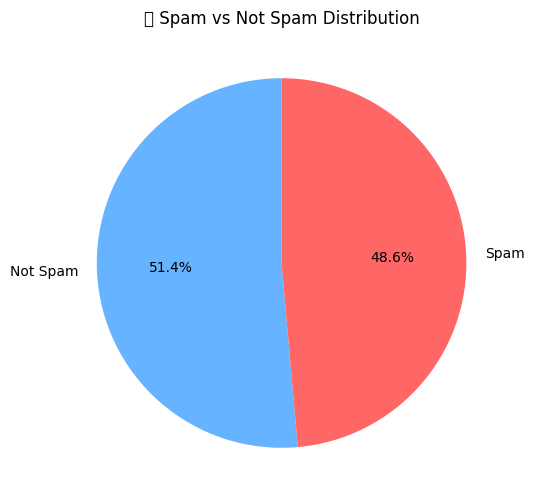

In [14]:
spam_counts = df['Spam'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(spam_counts, labels=['Not Spam', 'Spam'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title("📊 Spam vs Not Spam Distribution")
plt.show()


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)


In [11]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.53
Precision: 0.56
Recall: 0.52

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.55      0.53        71
           1       0.56      0.52      0.54        79

    accuracy                           0.53       150
   macro avg       0.53      0.53      0.53       150
weighted avg       0.54      0.53      0.53       150



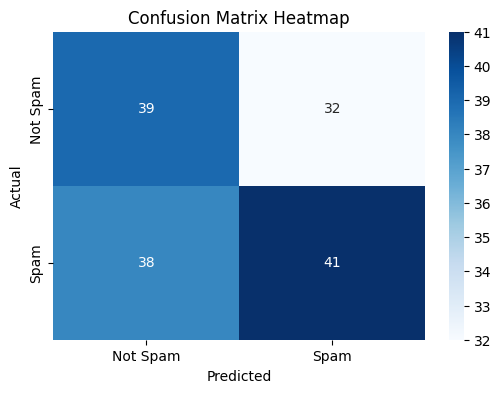

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


<ipython-input-13-2a42ae9ea383>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')


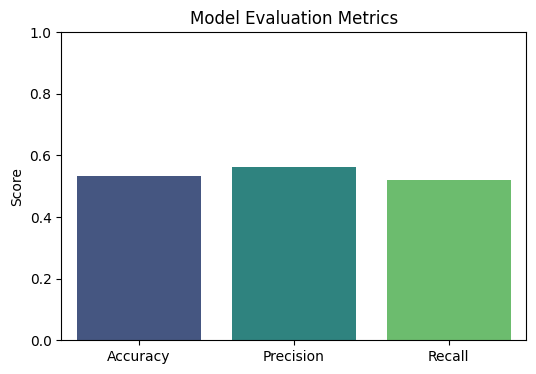

In [13]:
metrics = {'Accuracy': acc, 'Precision': prec, 'Recall': rec}
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette='viridis')
plt.ylim(0, 1)
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.show()
